In [119]:
#HW 7!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
pd.read_csv('global_air_quality.csv')

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [83]:
#read data
df = pd.read_csv('global_air_quality.csv')

In [85]:
#Make new column
df['PM25_Value'] = df.loc[:,'FactValueNumeric']
df[['FactValueNumeric','PM25_Value']]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [89]:
#Calculate Average PM2.5 Concentration
avg_pm25 = df.groupby('ParentLocation')['PM25_Value'].mean().reset_index()
avg_pm25.columns = ['ParentLocation','Average_PM25']
df = df.merge(avg_pm25, on='ParentLocation', how='left')

df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]

,Location,ParentLocation,PM25_Value,Average_PM25
0,Kenya,Africa,10.01,29.812282
1,Trinidad and Tobago,Americas,10.02,14.645728
2,United Kingdom of Great Britain and Northern I...,Europe,10.06,19.244727
3,Grenada,Americas,10.08,14.645728
4,Brazil,Americas,10.09,14.645728
...,...,...,...,...
9445,Belize,Americas,9.92,14.645728
9446,Trinidad and Tobago,Americas,9.92,14.645728
9447,Kenya,Africa,9.94,29.812282
9448,United States of America,Americas,9.95,14.645728


In [93]:
#Analyze Data
highest_PM25 = avg_pm25.loc[avg_pm25['Average_PM25'].idxmax()]
highest_PM25

ParentLocation    Eastern Mediterranean
Average_PM25                  38.403682
Name: 2, dtype: object

In [ ]:
#This is somewhat surprising to me. I would have expected places like India and China to have skewed the parent location for 
#South-East Asia to be the largest as the high populations cause there to be more industrialization and therefore particulate
#matter. Although, a bigger area spanned means that there are more rural places (with less particulate matter) so larger regions may
#have lower average PM count.

In [101]:
#Save the Processed Data
df[['ParentLocation','PM25_Value', 'Average_PM25']].to_csv('averages.csv', index=False)

In [103]:
pd.read_csv('averages.csv')

,ParentLocation,PM25_Value,Average_PM25
0,Africa,10.01,29.812282
1,Americas,10.02,14.645728
2,Europe,10.06,19.244727
3,Americas,10.08,14.645728
4,Americas,10.09,14.645728
...,...,...,...
9445,Americas,9.92,14.645728
9446,Americas,9.92,14.645728
9447,Africa,9.94,29.812282
9448,Americas,9.95,14.645728


In [113]:
#Planets, planets, planets!
planets = sns.load_dataset('planets')

In [115]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


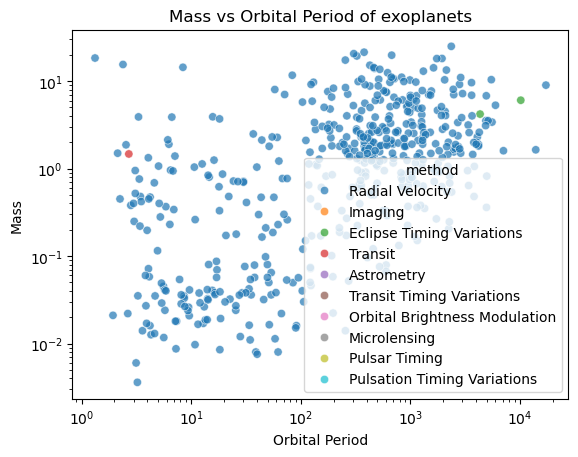

In [141]:
#Create a Scatter plot
plt.figure()
sns.scatterplot(planets, x = 'orbital_period', y='mass',hue = 'method',alpha = 0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Mass vs Orbital Period of exoplanets')
plt.xlabel('Orbital Period')
plt.ylabel('Mass')
plt.show()

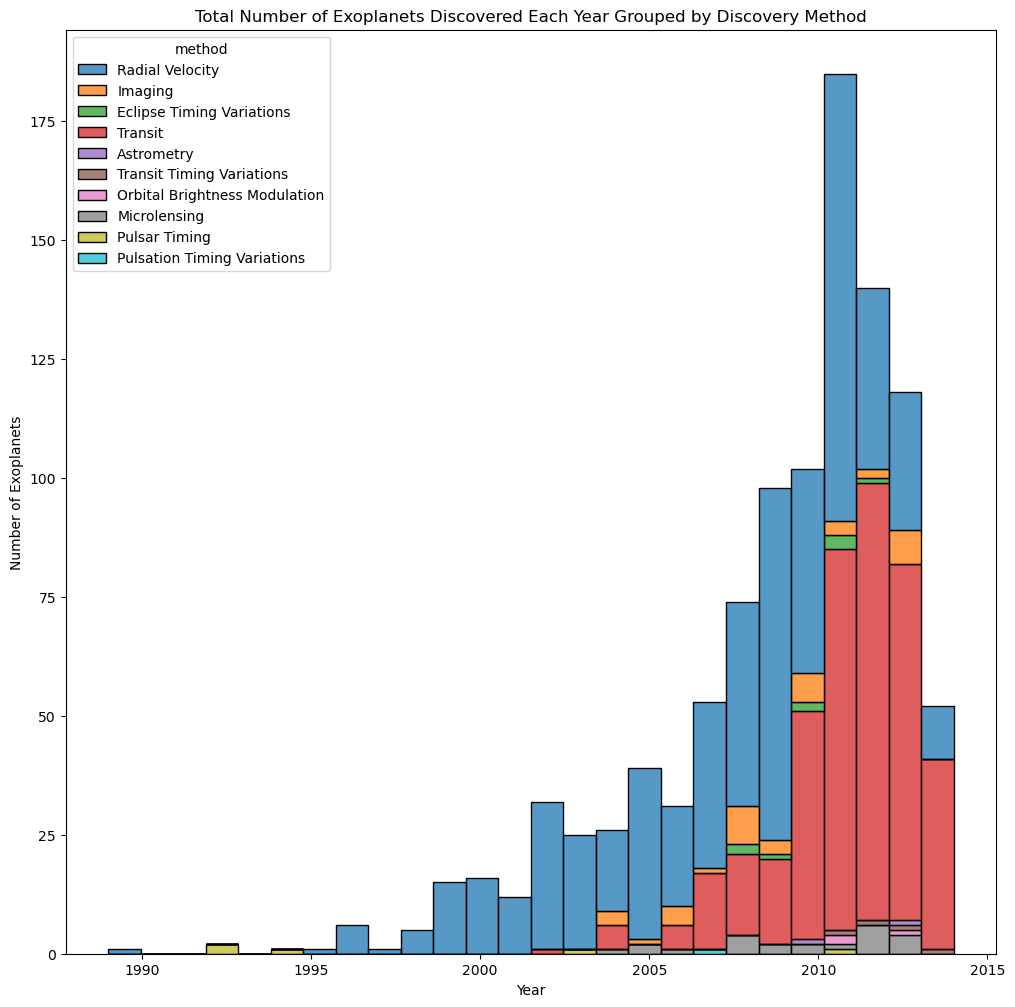

In [173]:
#Create a Bar Chart
plt.figure(figsize = (12.0,12.0))
sns.histplot(data = planets, x = 'year', hue = 'method', multiple = 'stack')
plt.title('Total Number of Exoplanets Discovered Each Year Grouped by Discovery Method')
plt.ylabel('Number of Exoplanets')
plt.xlabel('Year')
plt.show()